In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

d:\anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
d:\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
d:\anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df_opprtunities = pd.read_excel(r'untitled_spreadsheet__1_.xlsx', sheet_name='opportunites')

In [3]:
df_opprtunities

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE,status points,STATUS,gro region point,GEO_REGION_ID,...,SR_ID,dispostion points,DISPOSITION,shifting type points,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score
0,4033053,tushant singh,8400503470,8400503470,3.0,2,5.0,4,11.0,8.0,...,3928914.0,0.0,NaN,2.0,intra_city,14.0,8.0,2.0,android,37.0
1,3816903,NaN,9429722234,9429722234,NaN,0,NaN,4,NaN,6.0,...,3645894.0,NaN,NaN,NaN,intra_city,0.0,6.0,NaN,android,NaN
2,4027790,NaN,9970834349,9970834349,NaN,0,NaN,4,NaN,NaN,...,3921395.0,NaN,Follow up required,NaN,NaN,0.0,NaN,1.0,ios,NaN
3,3738431,Swapnil Sawant,9765869669,9765869669,NaN,2,NaN,4,NaN,8.0,...,3543948.0,NaN,NaN,NaN,intra_city,14.0,8.0,NaN,android,NaN
4,3986886,NaN,9515856801,9515856801,NaN,0,NaN,4,NaN,3.0,...,3866598.0,NaN,NaN,NaN,intra_city,14.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,3837163,Shweta R,8758492232,8758492232,NaN,2,NaN,0,NaN,8.0,...,3670615.0,NaN,Follow up required,NaN,inter_city,NaN,3.0,NaN,ios,NaN
12061,3823810,NaN,8850206979,8850206979,NaN,2,NaN,2,NaN,NaN,...,2130663.0,NaN,Quotation Shared,NaN,NaN,NaN,NaN,NaN,android,NaN
12062,3346728,Priyanka Singh,9769243713,9769243713,NaN,2,NaN,3,NaN,1.0,...,3034166.0,NaN,NaN,NaN,intra_city,NaN,1.0,NaN,android,NaN
12063,3346376,Thejus Joseph,9663401548,9663401548,NaN,2,NaN,3,NaN,3.0,...,3033674.0,NaN,NaN,NaN,intra_city,NaN,3.0,NaN,ios,NaN


In [4]:
df_orders = pd.read_excel(r'untitled_spreadsheet__1_.xlsx', sheet_name='orders')

In [5]:
df_orders

,CRN,SR_ID,SOURCE,STATUS,SERVICE_TYPE
0,PNM03513687,3928914,1,completed,Default
1,PNM86710660,3645894,1,supervisor_accepted,Default
2,PNM88373876,3921395,1,completed,Default
3,PNM98734057,3543948,1,completed,Default
4,PNM11100449,3866598,1,completed,Default
...,...,...,...,...,...
11044,PNM64926759,3424053,1,completed,Default
11045,PNM93831563,290227,1,completed,Default
11046,PNM98940391,3914067,1,completed,Default
11047,PNM90746216,3914078,0,completed,Default


In [6]:
df_join = df_opprtunities.join(
    df_orders.set_index('SR_ID'), 
    on='SR_ID', 
    how='left', 
    lsuffix='_opportunities', 
    rsuffix='_orders'
)

In [7]:
df_join.columns

Index(['ID', 'NAME', 'MOBILE', 'MOBILE.1', 'source points ',
       'SOURCE_opportunities', 'status points ', 'STATUS_opportunities',
       'gro region point ', 'GEO_REGION_ID', 'PICKUP_LOCATION',
       'PICKUP_ADDRESS', 'DROP_LOCATION', 'DROP_ADDRESS', 'SHIFTING_TS',
       'source detail points ', 'SOURCE_DETAIL', 'SR_ID', 'dispostion points ',
       'DISPOSITION', 'shifting type points', 'SHIFTING_TYPE',
       'drop geo region points', 'DROP_GEO_REGION_ID', 'platform point ',
       'PLATFORM', 'score', 'CRN', 'SOURCE_orders', 'STATUS_orders',
       'SERVICE_TYPE'],
      dtype='object')

In [8]:

# Assuming df_join is your DataFrame after the join
# Filter for completed orders
completed_orders = df_join[df_join['STATUS_orders'] == 'completed']
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,3.0,2,5.0,4,11.0,8.0,...,intra_city,14.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,NaN,0,NaN,4,NaN,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,NaN,2,NaN,4,NaN,8.0,...,intra_city,14.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,NaN,0,NaN,4,NaN,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,NaN,0,NaN,3,NaN,3.0,...,intra_city,0.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,NaN,2,NaN,4,NaN,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,NaN,2,NaN,4,NaN,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,NaN,2,NaN,4,NaN,3.0,...,intra_city,NaN,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,NaN,2,NaN,4,NaN,4.0,...,intra_city,NaN,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


In [9]:
completed_orders['STATUS_orders'].nunique()

1

In [10]:
print(completed_orders['GEO_REGION_ID'].duplicated().sum())


9620


In [11]:
status_counts = completed_orders.groupby(['GEO_REGION_ID', 'STATUS_orders']).size().reset_index(name='counts')

print(status_counts)

# Filter for only 'Completed' status
completed_status_counts = status_counts[status_counts['STATUS_orders'] == 'completed']
# Print the results
print(completed_status_counts)

    GEO_REGION_ID STATUS_orders  counts
0             1.0     completed    1366
1             2.0     completed    1701
2             3.0     completed    2832
3             4.0     completed     959
4             5.0     completed     522
5             6.0     completed     178
6             7.0     completed      65
7             8.0     completed    1040
8             9.0     completed     171
9            10.0     completed      40
10           11.0     completed      39
11           12.0     completed      27
12           13.0     completed      38
13           14.0     completed      36
    GEO_REGION_ID STATUS_orders  counts
0             1.0     completed    1366
1             2.0     completed    1701
2             3.0     completed    2832
3             4.0     completed     959
4             5.0     completed     522
5             6.0     completed     178
6             7.0     completed      65
7             8.0     completed    1040
8             9.0     completed     171


In [12]:
completed_status_counts['scores'] = completed_status_counts['counts'].rank(ascending=False, method='first').astype(int)
completed_status_counts['scores'] = completed_status_counts['scores'].apply(lambda x: len(completed_status_counts)+1 - x)
completed_status_counts

,GEO_REGION_ID,STATUS_orders,counts,scores
0,1.0,completed,1366,12
1,2.0,completed,1701,13
2,3.0,completed,2832,14
3,4.0,completed,959,10
4,5.0,completed,522,9
5,6.0,completed,178,8
6,7.0,completed,65,6
7,8.0,completed,1040,11
8,9.0,completed,171,7
9,10.0,completed,40,5


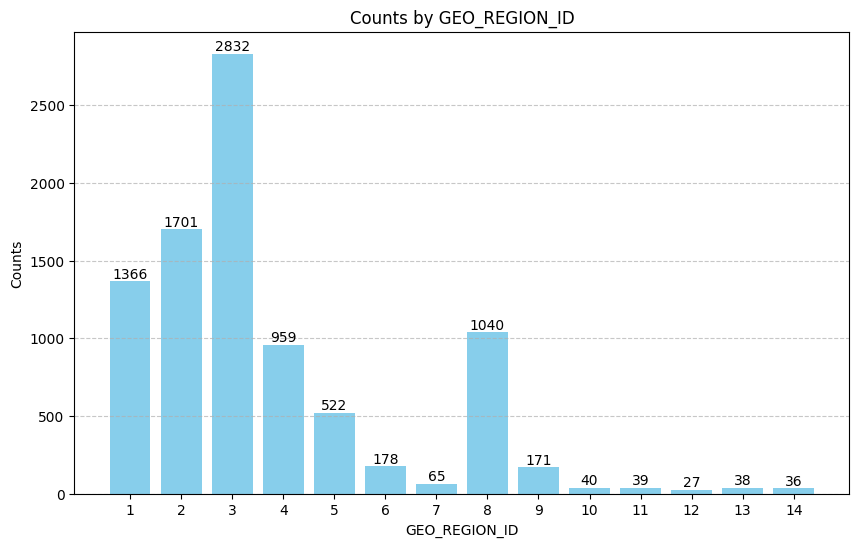

In [13]:
plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts['GEO_REGION_ID'], status_counts['counts'], color='skyblue')
plt.xlabel('GEO_REGION_ID')
plt.ylabel('Counts')
plt.title('Counts by GEO_REGION_ID')
plt.xticks(status_counts['GEO_REGION_ID'])  # Ensures all region IDs are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [14]:
completed_orders['gro region point '] = completed_orders['GEO_REGION_ID'].map(completed_status_counts.set_index('GEO_REGION_ID')['scores'])
completed_orders['gro region point '] = completed_orders['gro region point '].fillna(0)

In [15]:
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,3.0,2,5.0,4,11.0,8.0,...,intra_city,14.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,NaN,0,NaN,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,NaN,2,NaN,4,11.0,8.0,...,intra_city,14.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,NaN,0,NaN,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,NaN,0,NaN,3,14.0,3.0,...,intra_city,0.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,NaN,2,NaN,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,NaN,2,NaN,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,NaN,2,NaN,4,14.0,3.0,...,intra_city,NaN,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,NaN,2,NaN,4,10.0,4.0,...,intra_city,NaN,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


In [16]:
source_opportunities_counts = completed_orders['SOURCE_opportunities'].value_counts().reset_index(name='counts')

source_opportunities_counts['scores'] = source_opportunities_counts['counts'].rank(ascending=False, method='first').astype(int)
source_opportunities_counts['scores'] = source_opportunities_counts['scores'].apply(lambda x: len(source_opportunities_counts)+1 - x)

completed_orders['source points '] = completed_orders['SOURCE_opportunities'].map(source_opportunities_counts.set_index('index')['scores'])
completed_orders['source points '] = completed_orders['source points '].fillna(0)
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,5.0,4,11.0,8.0,...,intra_city,14.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,NaN,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,NaN,4,11.0,8.0,...,intra_city,14.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,NaN,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,NaN,3,14.0,3.0,...,intra_city,0.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,NaN,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,NaN,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,NaN,4,14.0,3.0,...,intra_city,NaN,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,NaN,4,10.0,4.0,...,intra_city,NaN,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


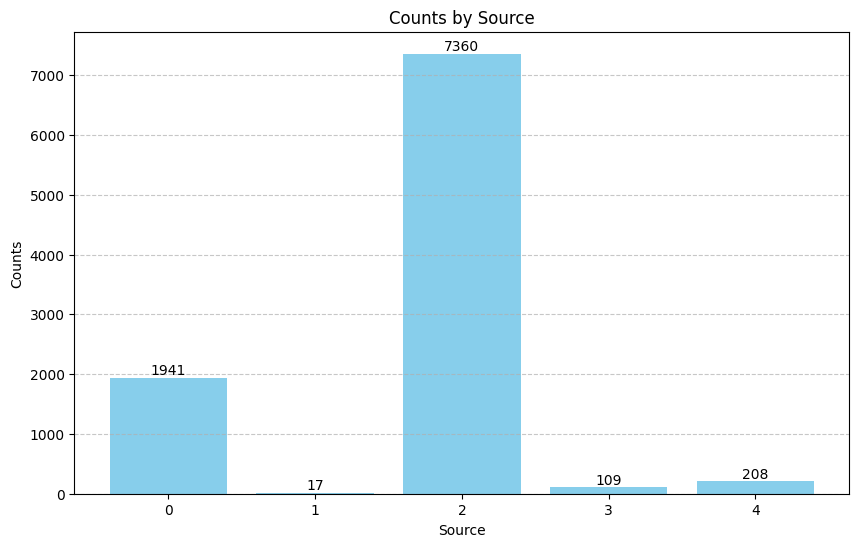

In [17]:
# plot the counts of each source
plt.figure(figsize=(10, 6))
bars = plt.bar(source_opportunities_counts['index'], source_opportunities_counts['counts'], color='skyblue')
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Counts by Source')
plt.xticks(source_opportunities_counts['index'])  # Ensures all sources are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.show()

In [18]:
status_opportunities_counts = completed_orders['STATUS_opportunities'].value_counts().reset_index(name='counts')
status_opportunities_counts['scores'] = status_opportunities_counts['counts'].rank(ascending=False, method='first').astype(int)
status_opportunities_counts['scores'] = status_opportunities_counts['scores'].apply(lambda x: len(status_opportunities_counts)+1 - x)

completed_orders['status points '] = completed_orders['STATUS_opportunities'].map(status_opportunities_counts.set_index('index')['scores'])
completed_orders['status points '] = completed_orders['status points '].fillna(0)
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,4,4,11.0,8.0,...,intra_city,14.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,4,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,4,4,11.0,8.0,...,intra_city,14.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,4,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,3,3,14.0,3.0,...,intra_city,0.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,4,4,14.0,3.0,...,intra_city,NaN,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,4,4,10.0,4.0,...,intra_city,NaN,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


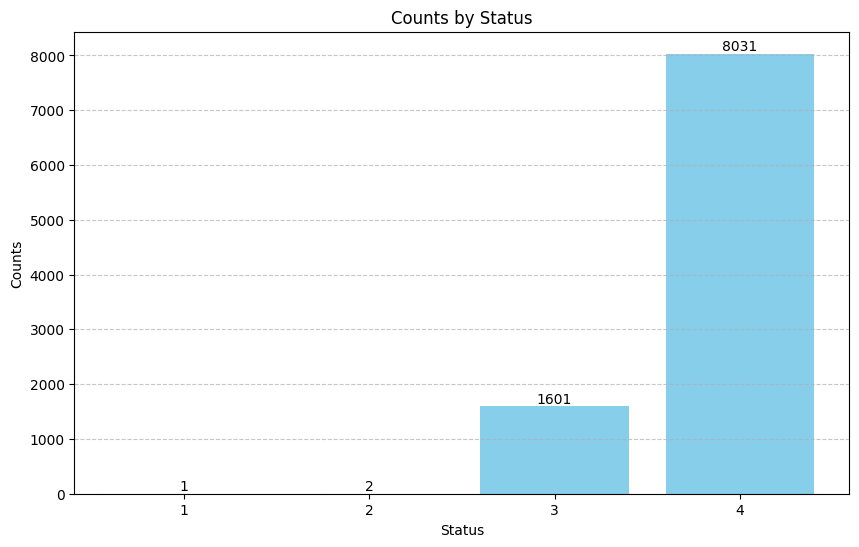

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.bar(status_opportunities_counts['index'], status_opportunities_counts['counts'], color='skyblue')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.title('Counts by Status')
plt.xticks(status_opportunities_counts['index'])  # Ensures all statuses are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.show()

In [20]:
# SOURCE_DETAIL
source_detail_counts = completed_orders['SOURCE_DETAIL'].value_counts().reset_index(name='counts')

source_detail_counts['scores'] = source_detail_counts['counts'].rank(ascending=False, method='first').astype(int)
source_detail_counts['scores'] = source_detail_counts['scores'].apply(lambda x: len(source_detail_counts)+1 - x)
source_detail_counts

completed_orders['source detail points '] = completed_orders['SOURCE_DETAIL'].map(source_detail_counts.set_index('index')['scores'])
completed_orders['source detail points '] = completed_orders['source detail points '].fillna(0)
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,4,4,11.0,8.0,...,intra_city,14.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,4,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,4,4,11.0,8.0,...,intra_city,14.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,4,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,3,3,14.0,3.0,...,intra_city,0.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,4,4,14.0,3.0,...,intra_city,NaN,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,4,4,10.0,4.0,...,intra_city,NaN,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


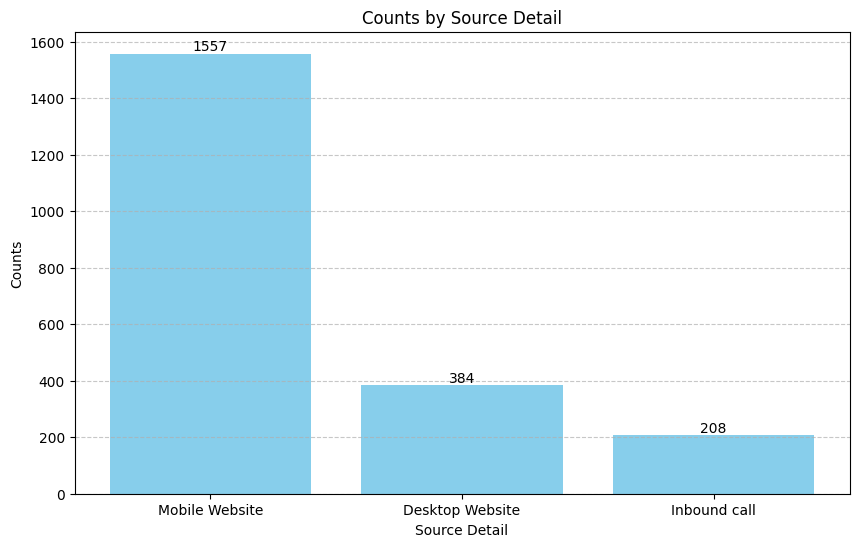

In [21]:
plt.figure(figsize=(10, 6))
bars = plt.bar(source_detail_counts['index'], source_detail_counts['counts'], color='skyblue')
plt.xlabel('Source Detail')
plt.ylabel('Counts')
plt.title('Counts by Source Detail')
plt.xticks(source_detail_counts['index'])  # Ensures all source details are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.show()

In [22]:
# DISPOSITION
disposition_counts = completed_orders['DISPOSITION'].value_counts().reset_index(name='counts')

disposition_counts['scores'] = disposition_counts['counts'].rank(ascending=False, method='first').astype(int)
disposition_counts['scores'] = disposition_counts['scores'].apply(lambda x: len(disposition_counts)+1 - x)

completed_orders['dispostion points '] = completed_orders['DISPOSITION'].map(disposition_counts.set_index('index')['scores'])
completed_orders['dispostion points '] = completed_orders['dispostion points '].fillna(0)
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,4,4,11.0,8.0,...,intra_city,14.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,4,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,4,4,11.0,8.0,...,intra_city,14.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,4,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,3,3,14.0,3.0,...,intra_city,0.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,NaN,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,4,4,14.0,3.0,...,intra_city,NaN,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,4,4,10.0,4.0,...,intra_city,NaN,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


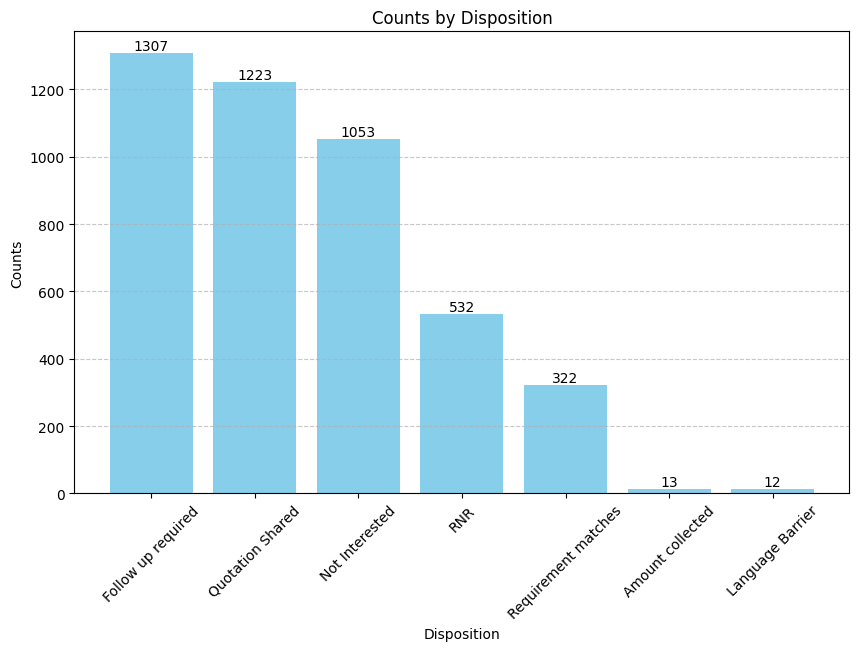

In [23]:
plt.figure(figsize=(10, 6))
bars = plt.bar(disposition_counts['index'], disposition_counts['counts'], color='skyblue')
plt.xlabel('Disposition')
plt.ylabel('Counts')
plt.title('Counts by Disposition')
plt.xticks(disposition_counts['index'], rotation=45)  # Ensures all dispositions are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [24]:
# 'DROP_GEO_REGION_ID'

drop_geo_region_counts = completed_orders['DROP_GEO_REGION_ID'].value_counts().reset_index(name='counts')

drop_geo_region_counts['scores'] = drop_geo_region_counts['counts'].rank(ascending=False, method='first').astype(int)
drop_geo_region_counts['scores'] = drop_geo_region_counts['scores'].apply(lambda x: len(drop_geo_region_counts)+1 - x)

completed_orders['drop geo region points'] = completed_orders['DROP_GEO_REGION_ID'].map(drop_geo_region_counts.set_index('index')['scores'])
completed_orders['drop geo region points'] = completed_orders['drop geo region points'].fillna(0)
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,4,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,NaN,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,4,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,3,3,14.0,3.0,...,intra_city,14.0,3.0,NaN,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,NaN,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,4,4,14.0,3.0,...,intra_city,14.0,3.0,NaN,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,4,4,10.0,4.0,...,intra_city,10.0,4.0,NaN,android,NaN,PNM98940391,1.0,completed,Default


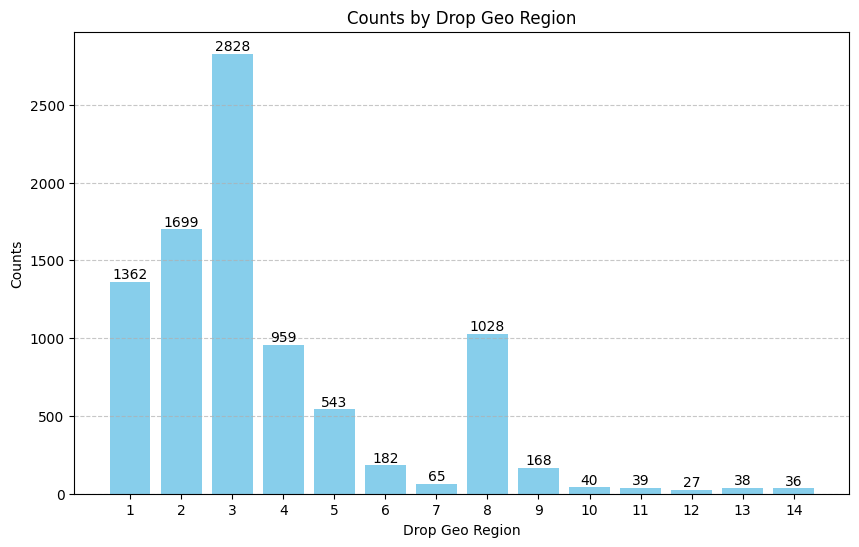

In [25]:
plt.figure(figsize=(10, 6))
bars = plt.bar(drop_geo_region_counts['index'], drop_geo_region_counts['counts'], color='skyblue')
plt.xlabel('Drop Geo Region')
plt.ylabel('Counts')
plt.title('Counts by Drop Geo Region')
plt.xticks(drop_geo_region_counts['index'])  # Ensures all drop geo regions are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [26]:
# 'PLATFORM'

platform_counts = completed_orders['PLATFORM'].value_counts().reset_index(name='counts')

platform_counts['scores'] = platform_counts['counts'].rank(ascending=False, method='first').astype(int)
platform_counts['scores'] = platform_counts['scores'].apply(lambda x: len(platform_counts)+1 - x)

completed_orders['platform point '] = completed_orders['PLATFORM'].map(platform_counts.set_index('index')['scores'])
completed_orders['platform point '] = completed_orders['platform point '].fillna(0)
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,37.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,4,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,NaN,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,NaN,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,4,4,14.0,3.0,...,intra_city,14.0,3.0,0.0,NaN,NaN,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,3,3,14.0,3.0,...,intra_city,14.0,3.0,2.0,android,NaN,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,NaN,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,NaN,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,4,4,14.0,3.0,...,intra_city,14.0,3.0,1.0,ios,NaN,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,4,4,10.0,4.0,...,intra_city,10.0,4.0,2.0,android,NaN,PNM98940391,1.0,completed,Default


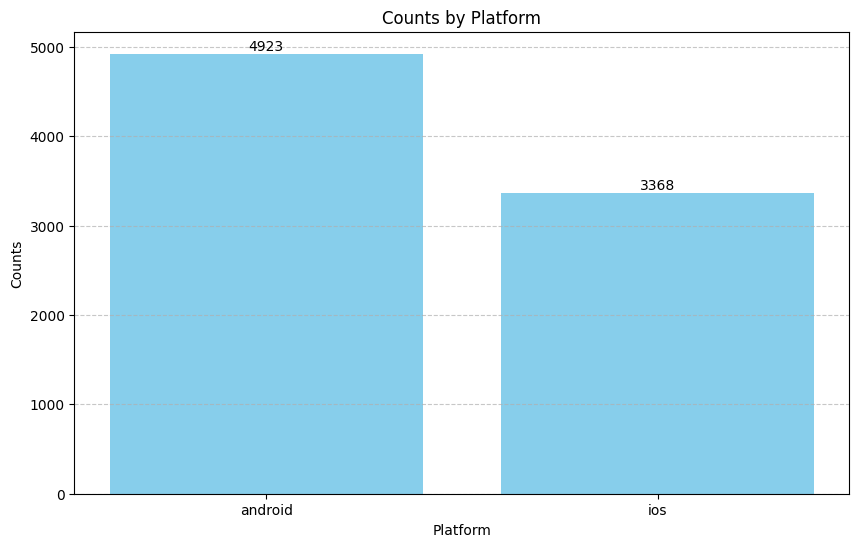

In [27]:
plt.figure(figsize=(10, 6))
bars = plt.bar(platform_counts['index'], platform_counts['counts'], color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Counts')
plt.title('Counts by Platform')
plt.xticks(platform_counts['index'])  # Ensures all platforms are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.show()

In [28]:
completed_orders['score'] = completed_orders['gro region point '] + completed_orders['source points '] + completed_orders['status points '] + completed_orders['source detail points '] + completed_orders['dispostion points '] + completed_orders['drop geo region points'] + completed_orders['platform point ']
completed_orders

,ID,NAME,MOBILE,MOBILE.1,source points,SOURCE_opportunities,status points,STATUS_opportunities,gro region point,GEO_REGION_ID,...,SHIFTING_TYPE,drop geo region points,DROP_GEO_REGION_ID,platform point,PLATFORM,score,CRN,SOURCE_orders,STATUS_orders,SERVICE_TYPE
0,4033053,tushant singh,8400503470,8400503470,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,33.0,PNM03513687,1.0,completed,Default
2,4027790,NaN,9970834349,9970834349,4,0,4,4,0.0,NaN,...,NaN,0.0,NaN,1.0,ios,19.0,PNM88373876,1.0,completed,Default
3,3738431,Swapnil Sawant,9765869669,9765869669,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,33.0,PNM98734057,1.0,completed,Default
4,3986886,NaN,9515856801,9515856801,4,0,4,4,14.0,3.0,...,intra_city,14.0,3.0,0.0,NaN,39.0,PNM11100449,1.0,completed,Default
6,3555396,NaN,8317325726,8317325726,4,0,3,3,14.0,3.0,...,intra_city,14.0,3.0,2.0,android,40.0,PNM39219942,1.0,completed,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,37.0,PNM64926759,1.0,completed,Default
11044,4022492,Chiranjivi Thuse,8419957619,8419957619,5,2,4,4,11.0,8.0,...,intra_city,11.0,8.0,2.0,android,37.0,PNM64926759,1.0,completed,Default
11045,4022066,Burhan K,9518342303,9518342303,5,2,4,4,14.0,3.0,...,intra_city,14.0,3.0,1.0,ios,42.0,PNM93831563,1.0,completed,Default
11046,4022589,kiran satya,7799934777,7799934777,5,2,4,4,10.0,4.0,...,intra_city,10.0,4.0,2.0,android,32.0,PNM98940391,1.0,completed,Default


In [29]:
completed_orders.to_excel('completed_orders_with_scores.xlsx', index=False)